In [1]:
.libPaths()

[1] "/usr/local/lib/R/site-library" "/usr/local/lib/R/library"

## 1. Seurat using sctransform on patient 3

In [2]:
library(Seurat)
library(ggplot2)
library(sctransform)

Loading required package: SeuratObject

Loading required package: sp


Attaching package: ‘SeuratObject’


The following objects are masked from ‘package:base’:

    intersect, t




In [3]:
patient3.data <- Read10X(data.dir = "/home/rstudio/run070/run070-nsclc-3_RSEC_MolsPerCell_MEX")
patient3 <- CreateSeuratObject(counts = patient3.data, project = "patient3", min.cells = 3, min.features = 200)

In [4]:
#QC #calculates the percentage of counts originating from a set of features #mitochondrial contamination
patient3[["percent.mt"]] <- PercentageFeatureSet(patient3, pattern = "^MT-")

Warning message:
“Default search for "data" layer in "RNA" assay yielded no results; utilizing "counts" layer instead.”


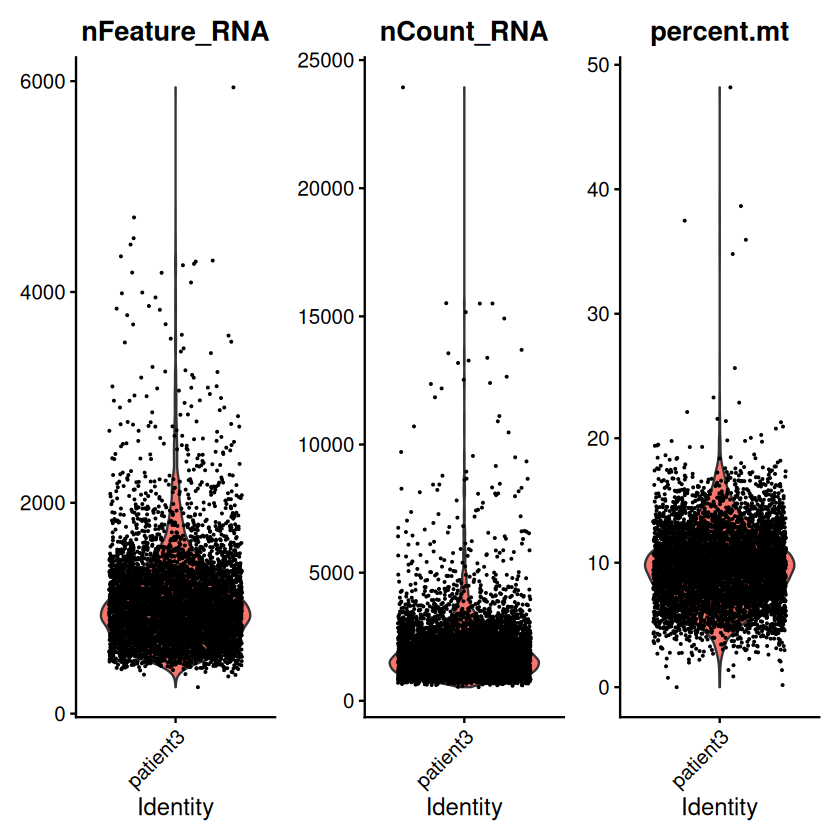

In [5]:
# Violin Plot
VlnPlot(patient3, features = c("nFeature_RNA", "nCount_RNA", "percent.mt"), ncol = 3)

In [6]:
# run sctransform
# this single command replaces NormalizeData(), ScaleData(), and FindVariableFeatures() #install glmGamPoi
patient3_transform <- SCTransform(patient3, verbose = FALSE) #No filtering based on mito. contamination

`vst.flavor` is set to 'v2' but could not find glmGamPoi installed.
Please install the glmGamPoi package for much faster estimation.
--------------------------------------------
install.packages('BiocManager')
BiocManager::install('glmGamPoi')
--------------------------------------------
Falling back to native (slower) implementation.


Warning message in theta.ml(Y, mu, sum(w), w, limit = control$maxit, trace = control$trace > :
“iteration limit reached”
Warning message in theta.ml(Y, mu, sum(w), w, limit = control$maxit, trace = control$trace > :
“iteration limit reached”
Warning message in theta.ml(Y, mu, sum(w), w, limit = control$maxit, trace = control$trace > :
“iteration limit reached”
Warning message in theta.ml(Y, mu, sum(w), w, limit = control$maxit, trace = control$trace > :
“iteration limit reached”
Warning message in theta.ml(Y, mu, sum(w), w, limit = control$maxit, trace = control$trace > :
“iteration limit reached”
Warning message in theta.ml(Y, mu, sum(w), w, limit = co

Warning message in theta.ml(Y, mu, sum(w), w, limit = control$maxit, trace = control$trace > :
“iteration limit reached”
Warning message in theta.ml(Y, mu, sum(w), w, limit = control$maxit, trace = control$trace > :
“iteration limit reached”
Warning message in theta.ml(Y, mu, sum(w), w, limit = control$maxit, trace = control$trace > :
“iteration limit reached”
Warning message in theta.ml(Y, mu, sum(w), w, limit = control$maxit, trace = control$trace > :
“iteration limit reached”
Warning message in theta.ml(Y, mu, sum(w), w, limit = control$maxit, trace = control$trace > :
“iteration limit reached”
Warning message in theta.ml(Y, mu, sum(w), w, limit = control$maxit, trace = control$trace > :
“iteration limit reached”
Warning message in theta.ml(Y, mu, sum(w), w, limit = control$maxit, trace = control$trace > :
“iteration limit reached”
Warning message in theta.ml(Y, mu, sum(w), w, limit = control$maxit, trace = control$trace > :
“iteration limit reached”
Warning message in theta.ml(Y, m

In [7]:
patient3_transform <- subset(patient3_transform, subset = percent.mt < 10)

Warning message:
“Default search for "data" layer in "RNA" assay yielded no results; utilizing "counts" layer instead.”


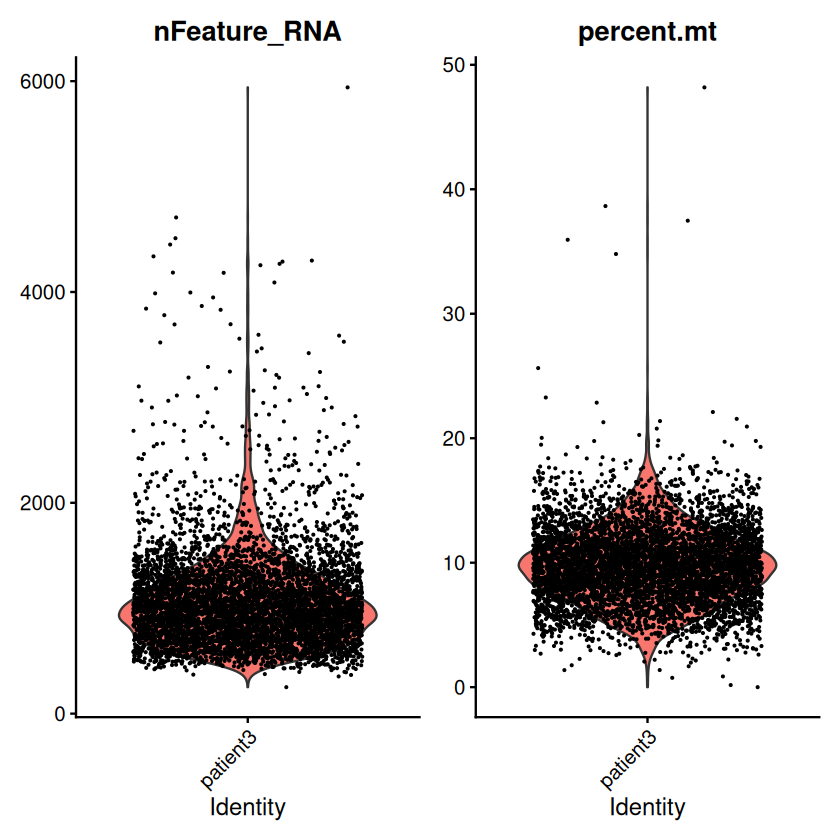

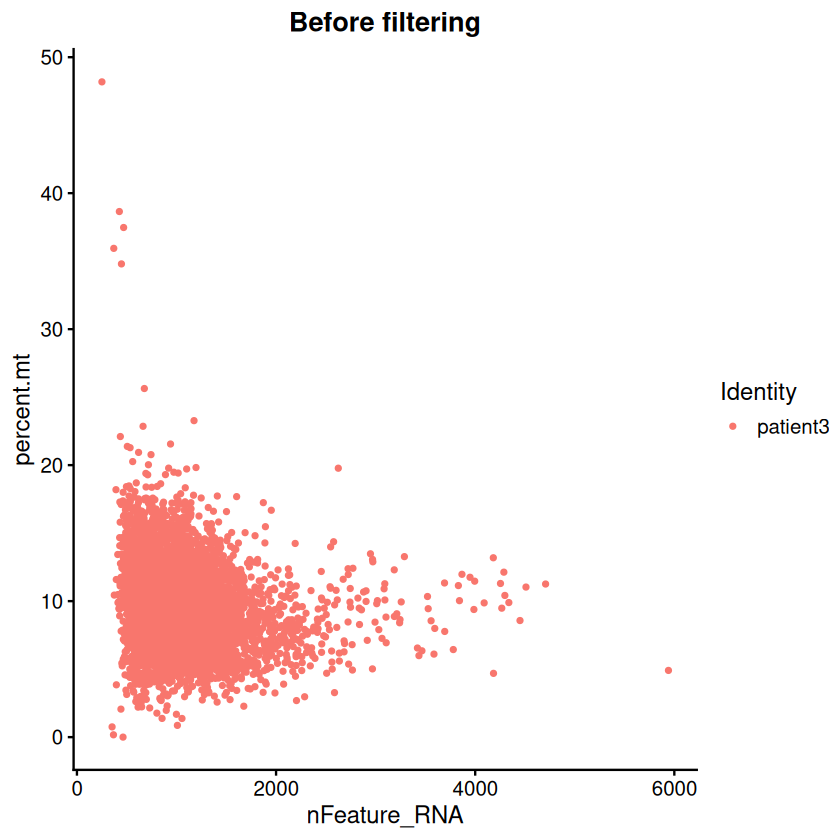

In [8]:
# before filtering
VlnPlot(patient3, features = c("nFeature_RNA", "percent.mt"), pt.size = 0.1)

FeatureScatter(patient3, feature1 = "nFeature_RNA", feature2 = "percent.mt") +
  ggtitle("Before filtering")

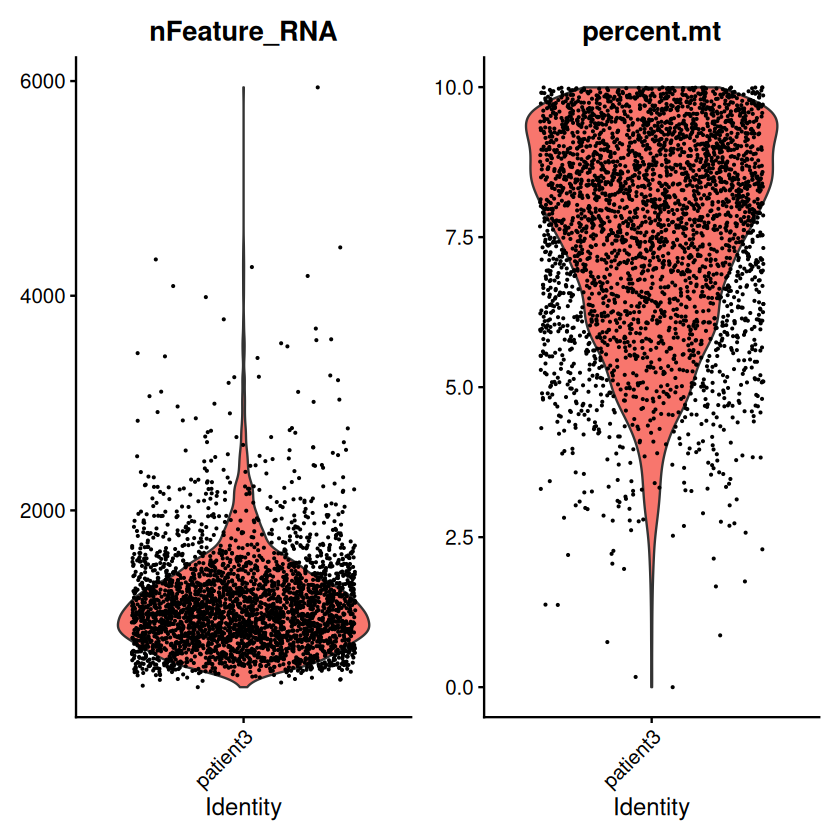

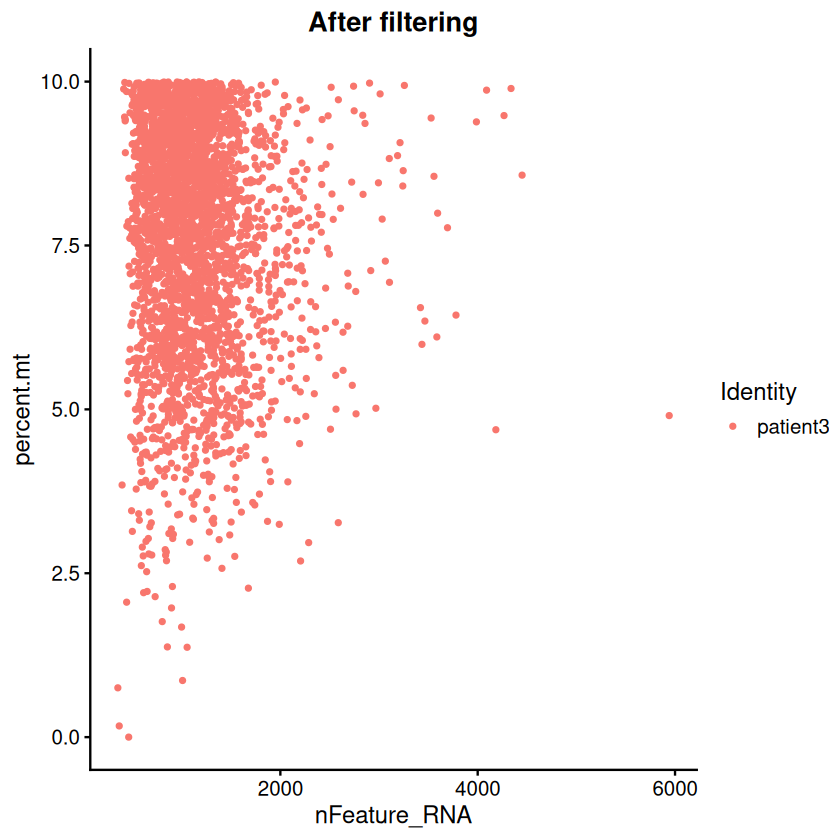

In [9]:
# after filtering
VlnPlot(patient3_transform, features = c("nFeature_RNA", "percent.mt"), pt.size = 0.1)

FeatureScatter(patient3_transform, feature1 = "nFeature_RNA", feature2 = "percent.mt") +
  ggtitle("After filtering")

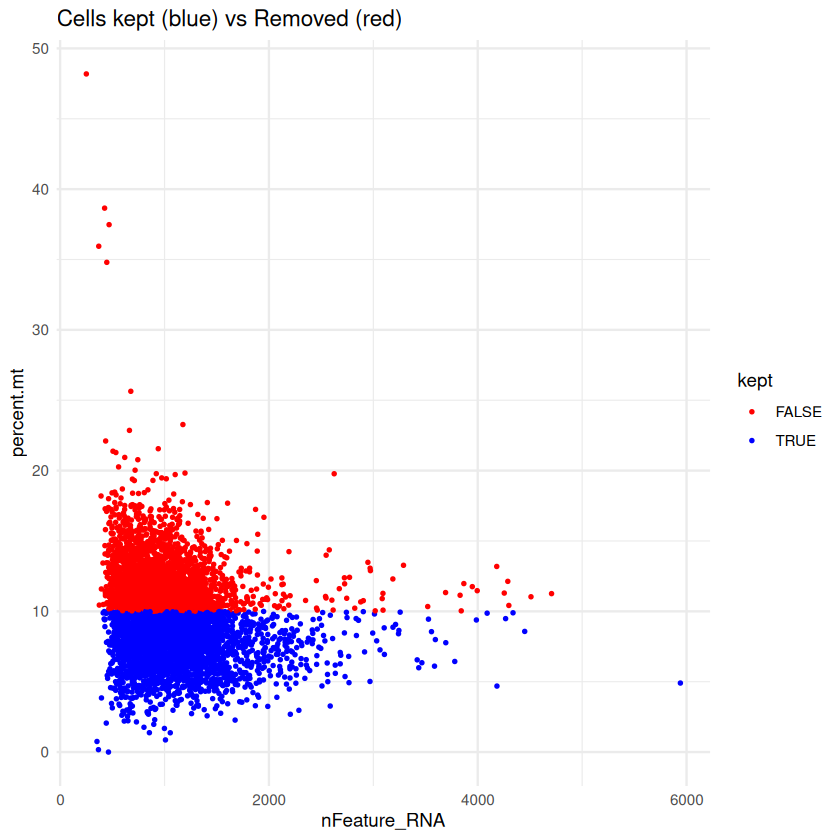

In [10]:
# Retained - Blue, Removed - Red
df <- FetchData(patient3, vars = c("nFeature_RNA", "percent.mt"))
df$kept <- rownames(df) %in% colnames(patient3_transform)

ggplot(df, aes(x = nFeature_RNA, y = percent.mt, color = kept)) +
  geom_point(size = 0.5) +
  scale_color_manual(values = c("red", "blue")) +
  theme_minimal() +
  labs(title = "Cells kept (blue) vs Removed (red)")

## 2. scRepertoire on patient 3

In [11]:
library(scRepertoire)
S1 <- read.delim("/home/rstudio/run070/run070-nsclc-3_VDJ_Dominant_Contigs_AIRR.tsv", sep = "\t", header = TRUE, stringsAsFactors = FALSE)

contig_list_1 <- list(S1)
contig_list_1 <- loadContigs(input = S1, 
                           format = "AIRR")

#converting columns in TCR data to character (string).
contig_list <- lapply(contig_list, function(df) {
  for (col in c("cdr3_nt", "cdr3", "chain", "barcode", "v_gene", "j_gene", "d_gene", "c_gene")) {
    if (col %in% names(df)) df[[col]] <- as.character(df[[col]])
  }
  df
})

In [12]:
data("contig_list")
#head(contig_list)
head(contig_list[[1]])

barcode            is_cell contig_id                   high_confidence length
1 AAACCTGAGTACGACG-1 True    AAACCTGAGTACGACG-1_contig_1 True            500   
2 AAACCTGAGTACGACG-1 True    AAACCTGAGTACGACG-1_contig_2 True            478   
4 AAACCTGCAACACGCC-1 True    AAACCTGCAACACGCC-1_contig_1 True            506   
5 AAACCTGCAACACGCC-1 True    AAACCTGCAACACGCC-1_contig_2 True            470   
6 AAACCTGCAGGCGATA-1 True    AAACCTGCAGGCGATA-1_contig_1 True            558   
7 AAACCTGCAGGCGATA-1 True    AAACCTGCAGGCGATA-1_contig_2 True            505   
  chain v_gene       d_gene j_gene  c_gene full_length productive
1 TRA   TRAV25       None   TRAJ20  TRAC   True        True      
2 TRB   TRBV5-1      None   TRBJ2-7 TRBC2  True        True      
4 TRA   TRAV38-2/DV8 None   TRAJ52  TRAC   True        True      
5 TRB   TRBV10-3     None   TRBJ2-2 TRBC2  True        True      
6 TRA   TRAV12-1     None   TRAJ9   TRAC   True        True      
7 TRB   TRBV9        None   TRBJ2-2 TRBC2  True        True      
  cdr3               cdr3_nt                                               
1 CGCSNDYKLSF        TGTGGGTGTTCTAACGACTACAAGCTCAGCTTT                     
2 CASSLTDRTYEQYF     TGCGCCAGCAGCTTGACCGACAGGACCTACGAGCAGTACTTC            
4 CAYRSAQAGGTSYGKLTF TGTGCTTATAGGAGCGCGCAGGCTGGTGGTACTAGCTATGGAAAGCTGACATTT
5 CAISEQGKGELFF      TGTGCCATCAGTGAACAGGGGAAAGGGGAGCTGTTTTTT               
6 CVVSDNTGGFKTIF     TGTGTGGTCTCCGATAATACTGGAGGCTTCAAAACTATCTTT            
7 CASSVRRERANTGELFF  TGTGCCAGCAGCGTAAGGAGGGAAAGGGCGAACACCGGGGAGCTGTTTTTT   
  reads umis raw_clonotype_id raw_consensus_id        
1  8344  4   clonotype123     clonotype123_consensus_2
2 65390 38   clonotype123     clonotype123_consensus_1
4 18372  8   clonotype124     clonotype124_consensus_1
5 34054  9   clonotype124     clonotype124_consensus_2
6  5018  2   clonotype1       clonotype1_consensus_2  
7 25110 11   clonotype1       clonotype1_consensus_1

In [13]:
combined.TCR_p3 <- combineTCR(
  contig_list_1,
  samples = c("P3_S1"),
  removeNA = TRUE,
  removeMulti = FALSE,
  filterMulti = FALSE
)

# output = a list of contig data frames that will be reduced to the reads associated with a single cell barcode. It will also combine the multiple reads into clone calls by either the nucleotide sequence (CTnt), amino acid sequence (CTaa), the VDJC gene sequence (CTgene), or the combination of the nucleotide and gene sequence (CTstrict).
head(combined.TCR_p3[[1]])

barcode        sample TCR1                                       
1  P3_S1_10006345 P3_S1  TRAV35*01.TRAJ18*01.TRAC                   
3  P3_S1_10007655 P3_S1  TRAV17*01.TRAJ4*01.TRAC                    
5  P3_S1_10024172 P3_S1  TRAV12-1*01.TRAJ42*01.TRAC                 
7  P3_S1_10069653 P3_S1  TRAV3*01.TRAJ34*01.NA;TRGV2*01.TRGJP1*01.NA
10 P3_S1_10075139 P3_S1  TRAV19*01.TRAJ6*01.TRAC                    
12 P3_S1_10088479 P3_S1  TRAV13-1*01.TRAJ54*01.TRAC                 
   cdr3_aa1                    
1  CAGPDRGSTLGRLYF             
3  CATDLFSGGYNKLIF             
5  CVVNLAYYGGSQGNLIF           
7  CAVRGSIGTDKLIF;CATWDGFGWFKIF
10 CALSGRSGGSYIPTF             
12 CAASMVGAQKLVF               
   cdr3_nt1                                                                          
1  TGTGCTGGACCCGACAGAGGCTCAACCCTGGGGAGGCTATACTTT                                     
3  TGTGCTACGGATCTCTTTTCTGGTGGCTACAATAAGCTGATTTTT                                     
5  TGTGTGGTGAACCTTGCTTATTATGGAGGAAGCCAAGGAAATCTCATCTTT                               
7  TGTGCTGTGAGAGGTTCAATAGGAACCGACAAGCTCATCTTT;TGTGCCACCTGGGACGGGTTCGGTTGGTTCAAGATATTT
10 TGTGCTCTGAGTGGTAGATCAGGAGGAAGCTACATACCTACATTT                                     
12 TGTGCAGCAAGTATGGTTGGAGCCCAGAAGCTGGTATTT                                           
   TCR2                                  cdr3_aa2        
1  TRBV20-1*01.TRBD2*01.TRBJ2-1*01.TRBC2 CSARGLGGSYNEQFF 
3  TRBV6-6*01.TRBD2*01.TRBJ2-7*01.TRBC2  CASSQAGEQYF     
5  TRBV9*01.NA.TRBJ1-5*01.TRBC1          CASSPGPSQPQHF   
7  TRDV3*01.TRDD3*01.TRDJ1*01.TRDC       CAFNRNWGIHSDKLIF
10 TRBV7-9*03.NA.TRBJ1-1*01.TRBC1        CASSFADSTTEAFF  
12 TRBV28*01.TRBD1*01.TRBJ2-7*01.TRBC2   CASSLSLGASYEQYF 
   cdr3_nt2                                        
1  TGCAGTGCTAGAGGATTGGGGGGGTCCTACAATGAGCAGTTCTTC   
3  TGTGCCAGCAGCCAGGCGGGCGAGCAGTACTTC               
5  TGTGCCAGCAGCCCAGGACCGAGTCAGCCCCAGCATTTT         
7  TGTGCCTTTAATCGAAACTGGGGGATACATTCCGATAAACTCATCTTT
10 TGTGCCAGCAGCTTTGCCGATTCTACCACTGAAGCTTTCTTT      
12 TGTGCCAGCAGTTTATCTTTGGGGGCCTCCTACGAGCAGTACTTC   
   CTgene                                                                     
1  TRAV35*01.TRAJ18*01.TRAC_TRBV20-1*01.TRBD2*01.TRBJ2-1*01.TRBC2             
3  TRAV17*01.TRAJ4*01.TRAC_TRBV6-6*01.TRBD2*01.TRBJ2-7*01.TRBC2               
5  TRAV12-1*01.TRAJ42*01.TRAC_TRBV9*01.NA.TRBJ1-5*01.TRBC1                    
7  TRAV3*01.TRAJ34*01.NA;TRGV2*01.TRGJP1*01.NA_TRDV3*01.TRDD3*01.TRDJ1*01.TRDC
10 TRAV19*01.TRAJ6*01.TRAC_TRBV7-9*03.NA.TRBJ1-1*01.TRBC1                     
12 TRAV13-1*01.TRAJ54*01.TRAC_TRBV28*01.TRBD1*01.TRBJ2-7*01.TRBC2             
   CTnt                                                                                                                               
1  TGTGCTGGACCCGACAGAGGCTCAACCCTGGGGAGGCTATACTTT_TGCAGTGCTAGAGGATTGGGGGGGTCCTACAATGAGCAGTTCTTC                                        
3  TGTGCTACGGATCTCTTTTCTGGTGGCTACAATAAGCTGATTTTT_TGTGCCAGCAGCCAGGCGGGCGAGCAGTACTTC                                                    
5  TGTGTGGTGAACCTTGCTTATTATGGAGGAAGCCAAGGAAATCTCATCTTT_TGTGCCAGCAGCCCAGGACCGAGTCAGCCCCAGCATTTT                                        
7  TGTGCTGTGAGAGGTTCAATAGGAACCGACAAGCTCATCTTT;TGTGCCACCTGGGACGGGTTCGGTTGGTTCAAGATATTT_TGTGCCTTTAATCGAAACTGGGGGATACATTCCGATAAACTCATCTTT
10 TGTGCTCTGAGTGGTAGATCAGGAGGAAGCTACATACCTACATTT_TGTGCCAGCAGCTTTGCCGATTCTACCACTGAAGCTTTCTTT                                           
12 TGTGCAGCAAGTATGGTTGGAGCCCAGAAGCTGGTATTT_TGTGCCAGCAGTTTATCTTTGGGGGCCTCCTACGAGCAGTACTTC                                              
   CTaa                                         
1  CAGPDRGSTLGRLYF_CSARGLGGSYNEQFF              
3  CATDLFSGGYNKLIF_CASSQAGEQYF                  
5  CVVNLAYYGGSQGNLIF_CASSPGPSQPQHF              
7  CAVRGSIGTDKLIF;CATWDGFGWFKIF_CAFNRNWGIHSDKLIF
10 CALSGRSGGSYIPTF_CASSFADSTTEAFF               
12 CAASMVGAQKLVF_CASSLSLGASYEQYF                
   CTstrict                                                                        

### Visualization

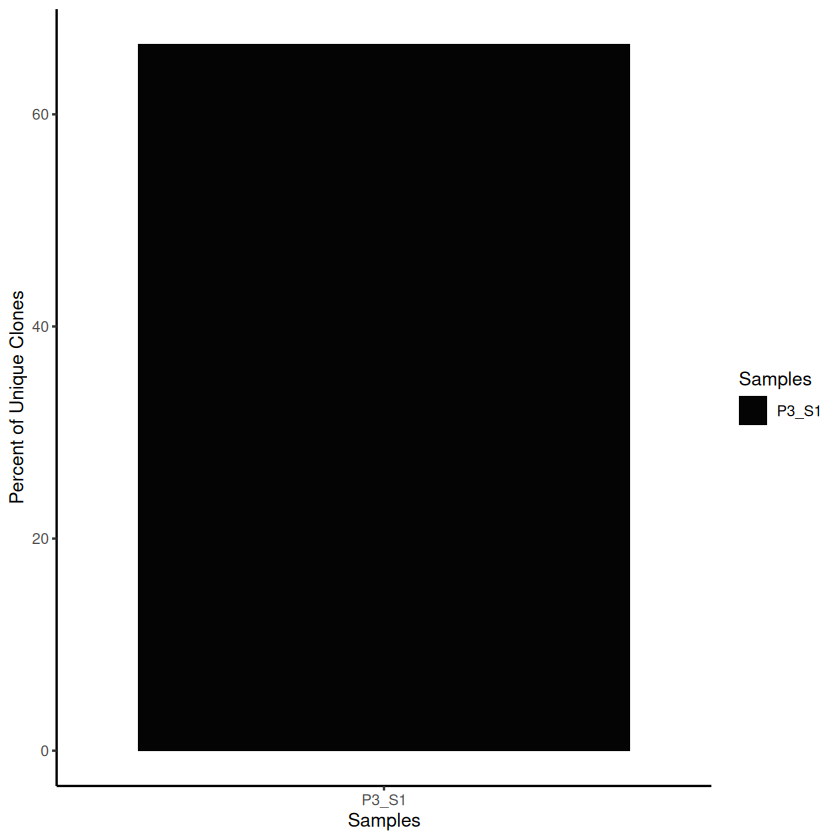

In [14]:
# total or relative numbers of unique clones.
clonalQuant(combined.TCR_p3, 
            cloneCall="strict", 
            chain = "both", 
            scale = TRUE)

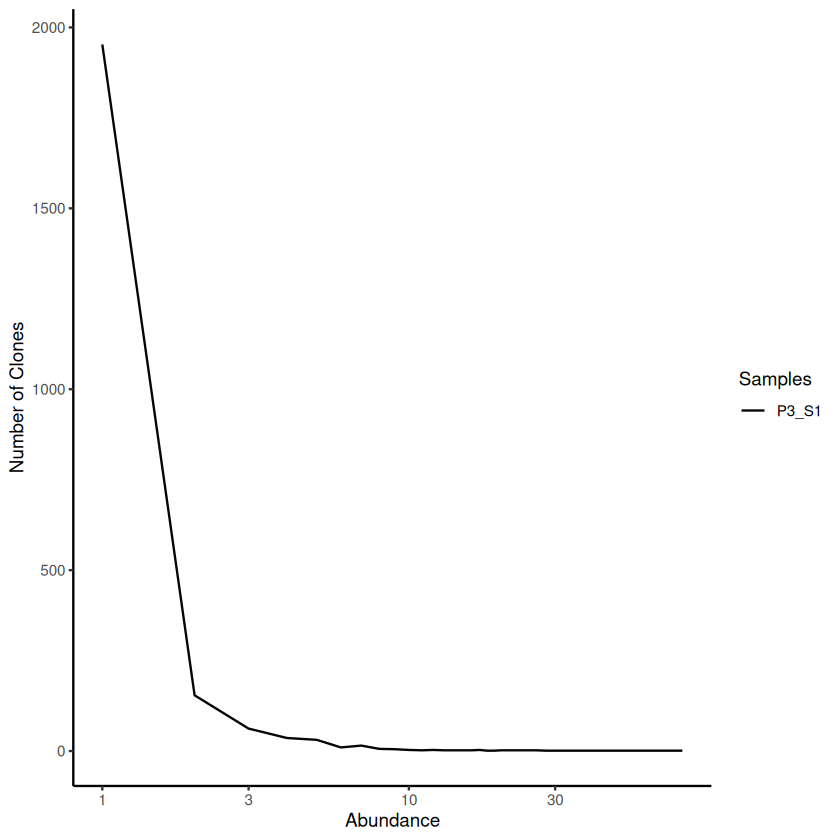

In [15]:
# a total number of clones by the number of instances within the sample or run
clonalAbundance(combined.TCR_p3, 
                cloneCall = "gene", 
                scale = FALSE)

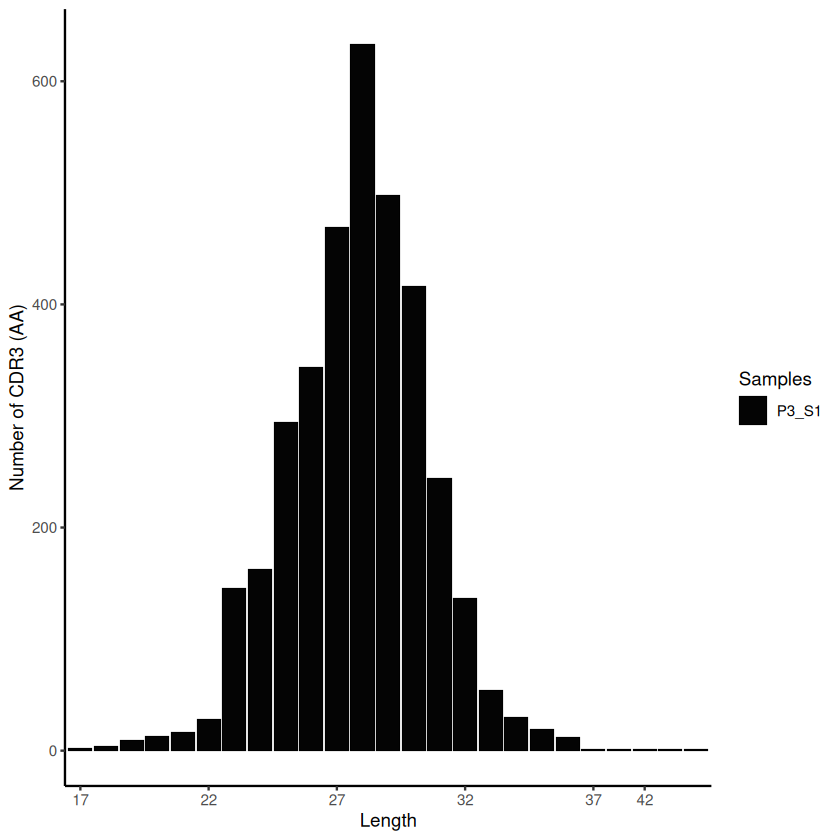

In [16]:
clonalLength(combined.TCR_p3, 
             cloneCall="aa", 
             chain = "both") 

## 3. Seurat using sctransform on patient 4

In [17]:
patient4.data <- Read10X(data.dir = "/home/rstudio/run071/run071_RSEC_MolsPerCell_MEX")
patient4 <- CreateSeuratObject(counts = patient4.data, project = "patient4", min.cells = 3, min.features = 200)

In [18]:
#QC #calculates the percentage of counts originating from a set of features #mitochondrial contamination
patient4[["percent.mt"]] <- PercentageFeatureSet(patient4, pattern = "^MT-")

Warning message:
“Default search for "data" layer in "RNA" assay yielded no results; utilizing "counts" layer instead.”


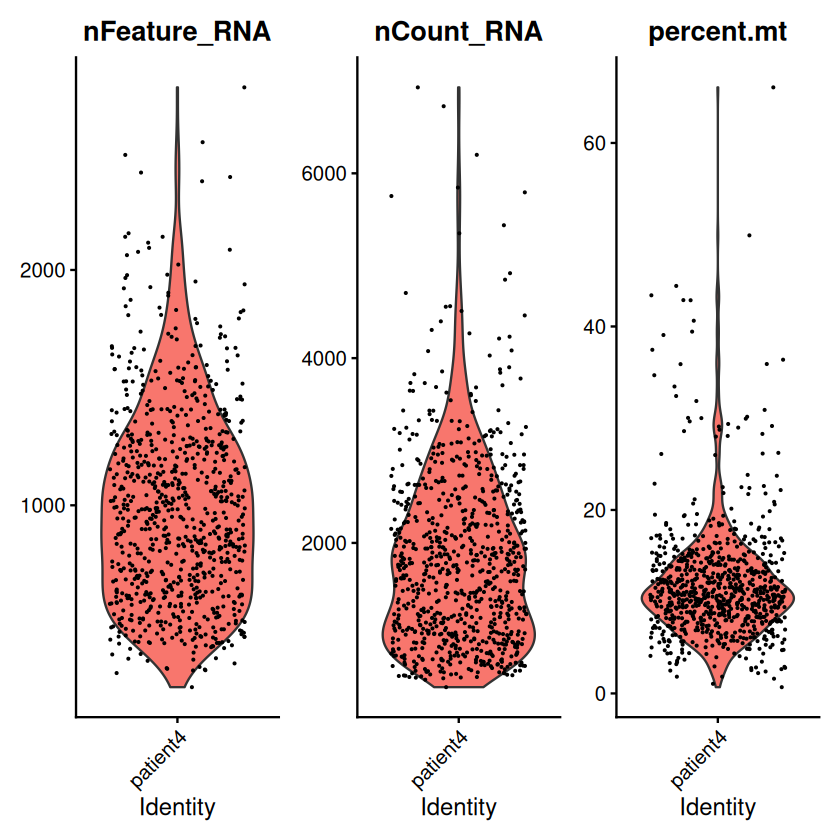

In [19]:
# Violin Plot
VlnPlot(patient4, features = c("nFeature_RNA", "nCount_RNA", "percent.mt"), ncol = 3)

In [20]:
# run sctransform
# this single command replaces NormalizeData(), ScaleData(), and FindVariableFeatures() #install glmGamPoi
patient4_transform <- SCTransform(patient4, verbose = FALSE) #No filtering based on mito. contamination

`vst.flavor` is set to 'v2' but could not find glmGamPoi installed.
Please install the glmGamPoi package for much faster estimation.
--------------------------------------------
install.packages('BiocManager')
BiocManager::install('glmGamPoi')
--------------------------------------------
Falling back to native (slower) implementation.


Warning message in theta.ml(Y, mu, sum(w), w, limit = control$maxit, trace = control$trace > :
“iteration limit reached”
Warning message in theta.ml(Y, mu, sum(w), w, limit = control$maxit, trace = control$trace > :
“iteration limit reached”
Warning message in theta.ml(Y, mu, sum(w), w, limit = control$maxit, trace = control$trace > :
“iteration limit reached”
Warning message in theta.ml(Y, mu, sum(w), w, limit = control$maxit, trace = control$trace > :
“iteration limit reached”
Warning message in theta.ml(Y, mu, sum(w), w, limit = control$maxit, trace = control$trace > :
“iteration limit reached”
Warning message in theta.ml(Y, mu, sum(w), w, limit = co

Warning message in theta.ml(Y, mu, sum(w), w, limit = control$maxit, trace = control$trace > :
“iteration limit reached”
Warning message in theta.ml(Y, mu, sum(w), w, limit = control$maxit, trace = control$trace > :
“iteration limit reached”
Warning message in theta.ml(Y, mu, sum(w), w, limit = control$maxit, trace = control$trace > :
“iteration limit reached”
Warning message in theta.ml(Y, mu, sum(w), w, limit = control$maxit, trace = control$trace > :
“iteration limit reached”
Warning message in theta.ml(Y, mu, sum(w), w, limit = control$maxit, trace = control$trace > :
“iteration limit reached”
Warning message in theta.ml(Y, mu, sum(w), w, limit = control$maxit, trace = control$trace > :
“iteration limit reached”
Warning message in theta.ml(Y, mu, sum(w), w, limit = control$maxit, trace = control$trace > :
“iteration limit reached”
Warning message in theta.ml(Y, mu, sum(w), w, limit = control$maxit, trace = control$trace > :
“iteration limit reached”
Warning message in theta.ml(Y, m

Warning message:
“Default search for "data" layer in "RNA" assay yielded no results; utilizing "counts" layer instead.”


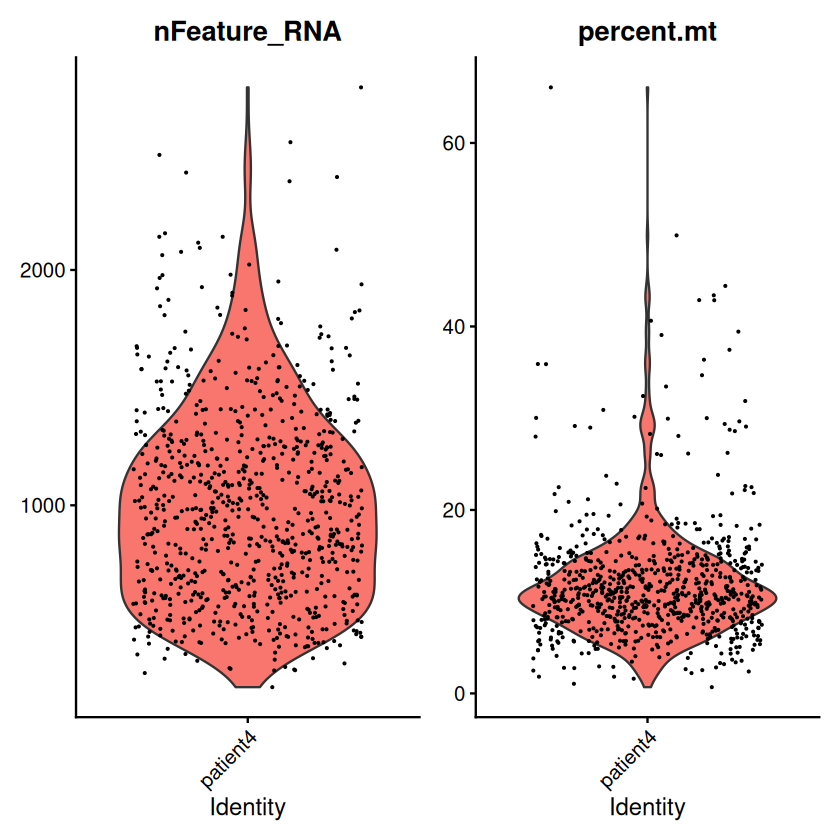

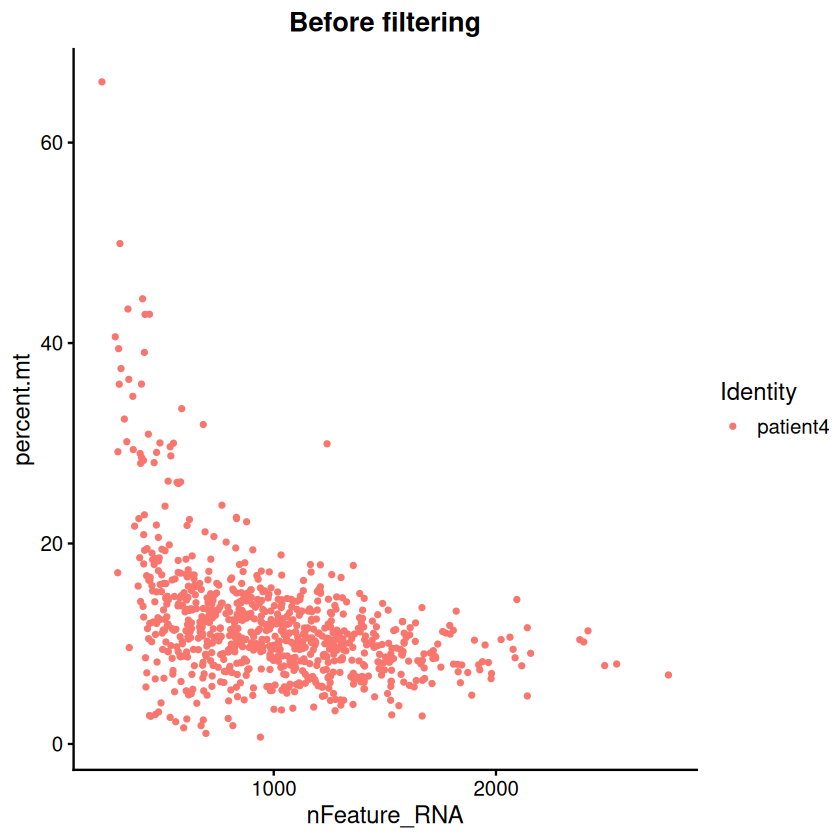

In [21]:
# before filtering
VlnPlot(patient4, features = c("nFeature_RNA", "percent.mt"), pt.size = 0.1)

FeatureScatter(patient4, feature1 = "nFeature_RNA", feature2 = "percent.mt") +
  ggtitle("Before filtering")

In [22]:
patient4_transform <- subset(patient4_transform, subset = percent.mt < 10)

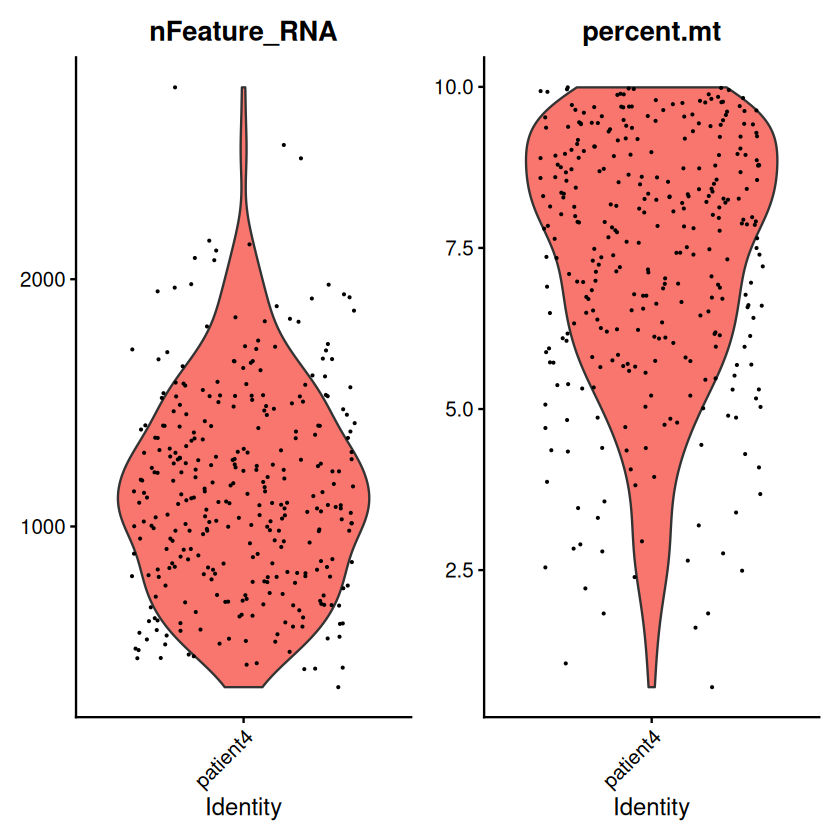

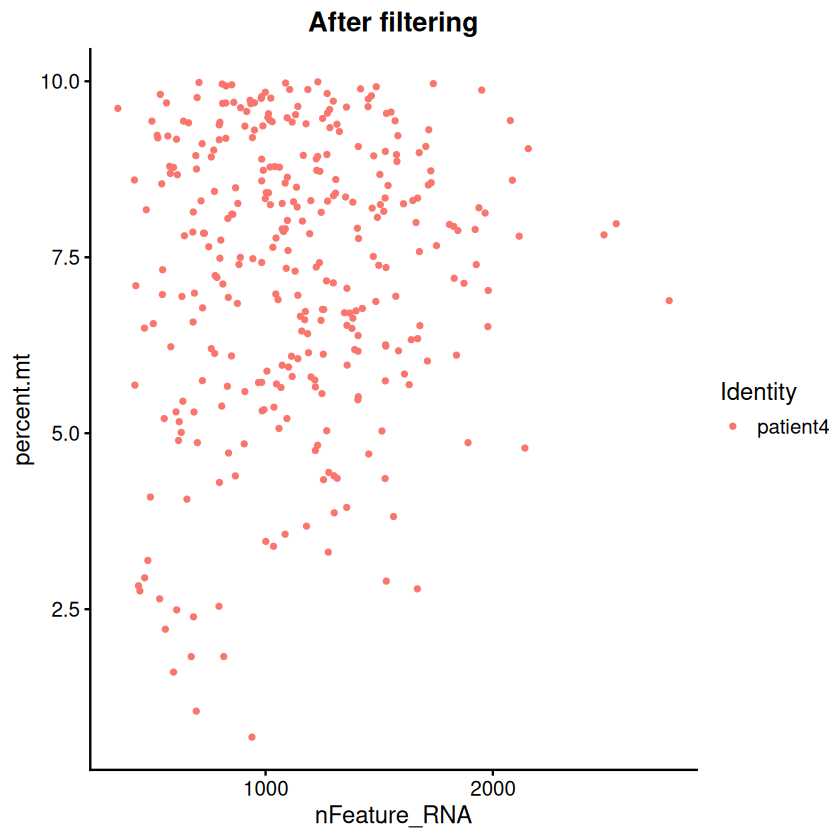

In [23]:
# after filtering
VlnPlot(patient4_transform, features = c("nFeature_RNA", "percent.mt"), pt.size = 0.1)

FeatureScatter(patient4_transform, feature1 = "nFeature_RNA", feature2 = "percent.mt") +
  ggtitle("After filtering")

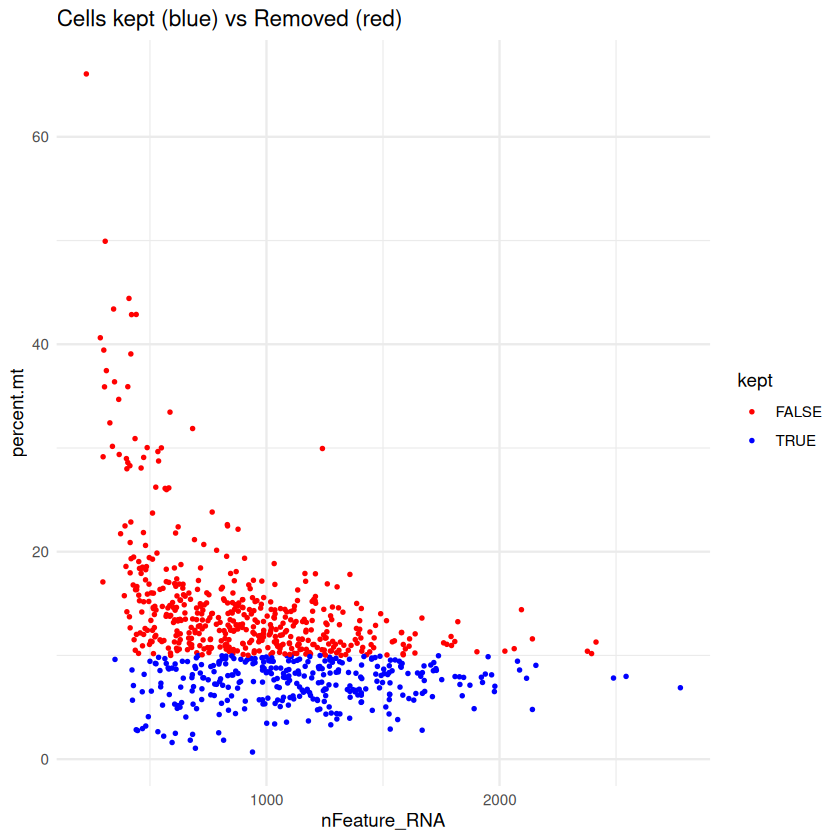

In [24]:
# Retained - Blue, Removed - Red
df <- FetchData(patient4, vars = c("nFeature_RNA", "percent.mt"))
df$kept <- rownames(df) %in% colnames(patient4_transform)

ggplot(df, aes(x = nFeature_RNA, y = percent.mt, color = kept)) +
  geom_point(size = 0.5) +
  scale_color_manual(values = c("red", "blue")) +
  theme_minimal() +
  labs(title = "Cells kept (blue) vs Removed (red)")

## 4. scRepertoire on patient 4

In [25]:
library(scRepertoire)
#S1 <- read.delim("/home/rstudio/run071-nsclc-4_VDJ_Dominant_Contigs_AIRR.tsv", sep = "\t", header = TRUE, stringsAsFactors = FALSE)

#contig_list <- list(S1)
#contig.list <- loadContigs(input = S1, 
#                           format = "AIRR")

In [26]:
S2 <- read.delim("/home/rstudio/run071-nsclc-4_VDJ_Dominant_Contigs_AIRR.tsv", sep = "\t", header = TRUE, stringsAsFactors = FALSE)

contig_list_2 <- loadContigs(input = S2, format = "AIRR")

#converting columns in TCR data to character (string).
contig_list_2 <- lapply(contig_list, function(df) {
  for (col in c("cdr3_nt", "cdr3", "chain", "barcode", "v_gene", "j_gene", "d_gene", "c_gene")) {
    if (col %in% names(df)) df[[col]] <- as.character(df[[col]])
  }
  df
})

In [27]:
#data("contig_list")
#head(contig_list)
head(contig_list_2[[1]])

barcode            is_cell contig_id                   high_confidence length
1 AAACCTGAGTACGACG-1 True    AAACCTGAGTACGACG-1_contig_1 True            500   
2 AAACCTGAGTACGACG-1 True    AAACCTGAGTACGACG-1_contig_2 True            478   
4 AAACCTGCAACACGCC-1 True    AAACCTGCAACACGCC-1_contig_1 True            506   
5 AAACCTGCAACACGCC-1 True    AAACCTGCAACACGCC-1_contig_2 True            470   
6 AAACCTGCAGGCGATA-1 True    AAACCTGCAGGCGATA-1_contig_1 True            558   
7 AAACCTGCAGGCGATA-1 True    AAACCTGCAGGCGATA-1_contig_2 True            505   
  chain v_gene       d_gene j_gene  c_gene full_length productive
1 TRA   TRAV25       None   TRAJ20  TRAC   True        True      
2 TRB   TRBV5-1      None   TRBJ2-7 TRBC2  True        True      
4 TRA   TRAV38-2/DV8 None   TRAJ52  TRAC   True        True      
5 TRB   TRBV10-3     None   TRBJ2-2 TRBC2  True        True      
6 TRA   TRAV12-1     None   TRAJ9   TRAC   True        True      
7 TRB   TRBV9        None   TRBJ2-2 TRBC2  True        True      
  cdr3               cdr3_nt                                               
1 CGCSNDYKLSF        TGTGGGTGTTCTAACGACTACAAGCTCAGCTTT                     
2 CASSLTDRTYEQYF     TGCGCCAGCAGCTTGACCGACAGGACCTACGAGCAGTACTTC            
4 CAYRSAQAGGTSYGKLTF TGTGCTTATAGGAGCGCGCAGGCTGGTGGTACTAGCTATGGAAAGCTGACATTT
5 CAISEQGKGELFF      TGTGCCATCAGTGAACAGGGGAAAGGGGAGCTGTTTTTT               
6 CVVSDNTGGFKTIF     TGTGTGGTCTCCGATAATACTGGAGGCTTCAAAACTATCTTT            
7 CASSVRRERANTGELFF  TGTGCCAGCAGCGTAAGGAGGGAAAGGGCGAACACCGGGGAGCTGTTTTTT   
  reads umis raw_clonotype_id raw_consensus_id        
1  8344  4   clonotype123     clonotype123_consensus_2
2 65390 38   clonotype123     clonotype123_consensus_1
4 18372  8   clonotype124     clonotype124_consensus_1
5 34054  9   clonotype124     clonotype124_consensus_2
6  5018  2   clonotype1       clonotype1_consensus_2  
7 25110 11   clonotype1       clonotype1_consensus_1

In [28]:
combined.TCR_p4 <- combineTCR(
  contig_list_2,
  samples = c("P4_S1"),
  removeNA = TRUE,
  removeMulti = FALSE,
  filterMulti = FALSE
)

# output = a list of contig data frames that wilcox.testl be reduced to the reads associated with a single cell barcode. It will also combine the multiple reads into clone calls by either the nucleotide sequence (CTnt), amino acid sequence (CTaa), the VDJC gene sequence (CTgene), or the combination of the nucleotide and gene sequence (CTstrict).
head(combined.TCR_p4[[1]])

barcode                  sample TCR1                     cdr3_aa1          
1  P4_S1_AAACCTGAGTACGACG-1 P4_S1  TRAV25.TRAJ20.TRAC       CGCSNDYKLSF       
3  P4_S1_AAACCTGCAACACGCC-1 P4_S1  TRAV38-2/DV8.TRAJ52.TRAC CAYRSAQAGGTSYGKLTF
5  P4_S1_AAACCTGCAGGCGATA-1 P4_S1  TRAV12-1.TRAJ9.TRAC      CVVSDNTGGFKTIF    
7  P4_S1_AAACCTGCATGAGCGA-1 P4_S1  TRAV12-1.TRAJ9.TRAC      CVVSDNTGGFKTIF    
10 P4_S1_AAACGGGAGCGTTTAC-1 P4_S1  TRAV12-1.TRAJ9.TRAC      CVVSDNTGGFKTIF    
12 P4_S1_AAACGGGAGGGCACTA-1 P4_S1  TRAV12-1.TRAJ9.TRAC      CVVSDNTGGFKTIF    
   cdr3_nt1                                              
1  TGTGGGTGTTCTAACGACTACAAGCTCAGCTTT                     
3  TGTGCTTATAGGAGCGCGCAGGCTGGTGGTACTAGCTATGGAAAGCTGACATTT
5  TGTGTGGTCTCCGATAATACTGGAGGCTTCAAAACTATCTTT            
7  TGTGTGGTCTCCGATAATACTGGAGGCTTCAAAACTATCTTT            
10 TGTGTGGTCTCCGATAATACTGGAGGCTTCAAAACTATCTTT            
12 TGTGTGGTCTCCGATAATACTGGAGGCTTCAAAACTATCTTT            
   TCR2                        cdr3_aa2         
1  TRBV5-1.None.TRBJ2-7.TRBC2  CASSLTDRTYEQYF   
3  TRBV10-3.None.TRBJ2-2.TRBC2 CAISEQGKGELFF    
5  TRBV9.None.TRBJ2-2.TRBC2    CASSVRRERANTGELFF
7  TRBV9.None.TRBJ2-2.TRBC2    CASSVRRERANTGELFF
10 TRBV9.None.TRBJ2-2.TRBC2    CASSVRRERANTGELFF
12 TRBV9.None.TRBJ2-2.TRBC2    CASSVRRERANTGELFF
   cdr3_nt2                                           
1  TGCGCCAGCAGCTTGACCGACAGGACCTACGAGCAGTACTTC         
3  TGTGCCATCAGTGAACAGGGGAAAGGGGAGCTGTTTTTT            
5  TGTGCCAGCAGCGTAAGGAGGGAAAGGGCGAACACCGGGGAGCTGTTTTTT
7  TGTGCCAGCAGCGTAAGGAGGGAAAGGGCGAACACCGGGGAGCTGTTTTTT
10 TGTGCCAGCAGCGTAAGGAGGGAAAGGGCGAACACCGGGGAGCTGTTTTTT
12 TGTGCCAGCAGCGTAAGGAGGGAAAGGGCGAACACCGGGGAGCTGTTTTTT
   CTgene                                              
1  TRAV25.TRAJ20.TRAC_TRBV5-1.None.TRBJ2-7.TRBC2       
3  TRAV38-2/DV8.TRAJ52.TRAC_TRBV10-3.None.TRBJ2-2.TRBC2
5  TRAV12-1.TRAJ9.TRAC_TRBV9.None.TRBJ2-2.TRBC2        
7  TRAV12-1.TRAJ9.TRAC_TRBV9.None.TRBJ2-2.TRBC2        
10 TRAV12-1.TRAJ9.TRAC_TRBV9.None.TRBJ2-2.TRBC2        
12 TRAV12-1.TRAJ9.TRAC_TRBV9.None.TRBJ2-2.TRBC2        
   CTnt                                                                                          
1  TGTGGGTGTTCTAACGACTACAAGCTCAGCTTT_TGCGCCAGCAGCTTGACCGACAGGACCTACGAGCAGTACTTC                  
3  TGTGCTTATAGGAGCGCGCAGGCTGGTGGTACTAGCTATGGAAAGCTGACATTT_TGTGCCATCAGTGAACAGGGGAAAGGGGAGCTGTTTTTT
5  TGTGTGGTCTCCGATAATACTGGAGGCTTCAAAACTATCTTT_TGTGCCAGCAGCGTAAGGAGGGAAAGGGCGAACACCGGGGAGCTGTTTTTT
7  TGTGTGGTCTCCGATAATACTGGAGGCTTCAAAACTATCTTT_TGTGCCAGCAGCGTAAGGAGGGAAAGGGCGAACACCGGGGAGCTGTTTTTT
10 TGTGTGGTCTCCGATAATACTGGAGGCTTCAAAACTATCTTT_TGTGCCAGCAGCGTAAGGAGGGAAAGGGCGAACACCGGGGAGCTGTTTTTT
12 TGTGTGGTCTCCGATAATACTGGAGGCTTCAAAACTATCTTT_TGTGCCAGCAGCGTAAGGAGGGAAAGGGCGAACACCGGGGAGCTGTTTTTT
   CTaa                            
1  CGCSNDYKLSF_CASSLTDRTYEQYF      
3  CAYRSAQAGGTSYGKLTF_CAISEQGKGELFF
5  CVVSDNTGGFKTIF_CASSVRRERANTGELFF
7  CVVSDNTGGFKTIF_CASSVRRERANTGELFF
10 CVVSDNTGGFKTIF_CASSVRRERANTGELFF
12 CVVSDNTGGFKTIF_CASSVRRERANTGELFF
   CTstrict                                                                                                                                           
1  TRAV25.TRAJ20.TRAC;TGTGGGTGTTCTAACGACTACAAGCTCAGCTTT_TRBV5-1.None.TRBJ2-7.TRBC2;TGCGCCAGCAGCTTGACCGACAGGACCTACGAGCAGTACTTC                         
3  TRAV38-2/DV8.TRAJ52.TRAC;TGTGCTTATAGGAGCGCGCAGGCTGGTGGTACTAGCTATGGAAAGCTGACATTT_TRBV10-3.None.TRBJ2-2.TRBC2;TGTGCCATCAGTGAACAGGGGAAAGGGGAGCTGTTTTTT
5  TRAV12-1.TRAJ9.TRAC;TGTGTGGTCTCCGATAATACTGGAGGCTTCAAAACTATCTTT_TRBV9.None.TRBJ2-2.TRBC2;TGTGCCAGCAGCGTAAGGAGGGAAAGGGCGAACACCGGGGAGCTGTTTTTT        
7  TRAV12-1.TRAJ9.TRAC;TGTGTGGTCTCCGATAATACTGGAGGCTTCAAAACTATCTTT_TRBV9.None.TRBJ2-2.TRBC2;TGTGCCAGCAGCGTAAGGAGGGAAAGGGCGAACACCGGGGAGCTGTTTTTT        
10 TRAV12-1.TRAJ9.TRAC;TGTGTGGTCTCCGATAATACTGGAGGCTTCAAAACTATCTTT_TRBV9.None.TRBJ2-2.TRBC2;TGTGCCAGCAGCGTAAGGAGGGAAAGGGCGAACACCGGGGAGCTGTTTTTT        
12 TRAV12-1.TRAJ9.TRAC;TGTGTGGTCTCCGATAATACTGGAGGCTTCAAAACTATCTTT_TRBV9.None.TRB

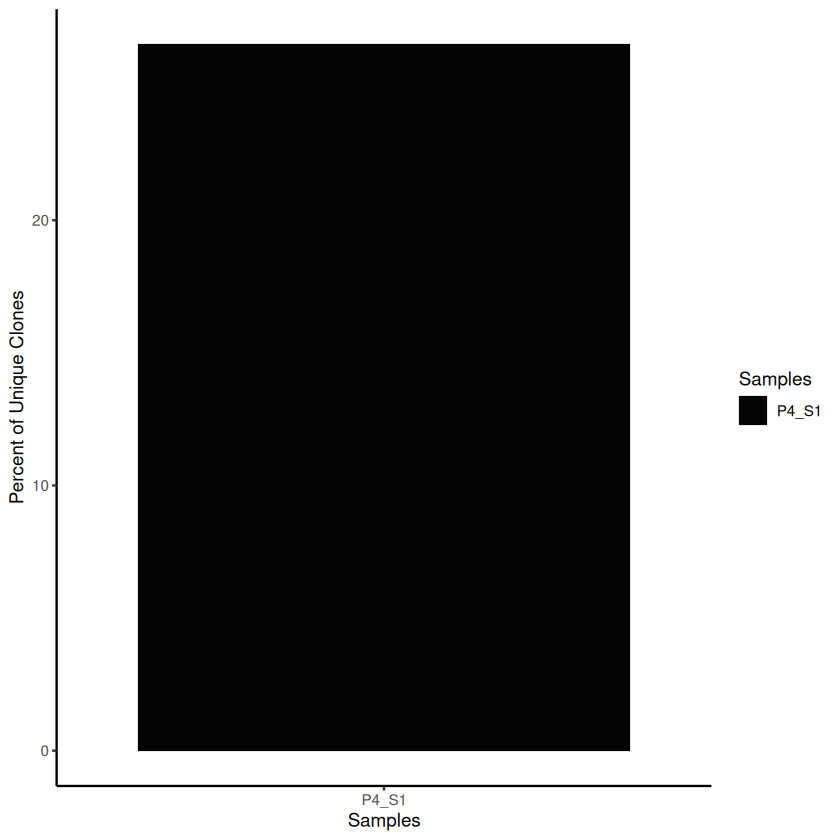

In [29]:
# total or relative numbers of unique clones.
clonalQuant(combined.TCR_p4, 
            cloneCall="strict", 
            chain = "both", 
            scale = TRUE)

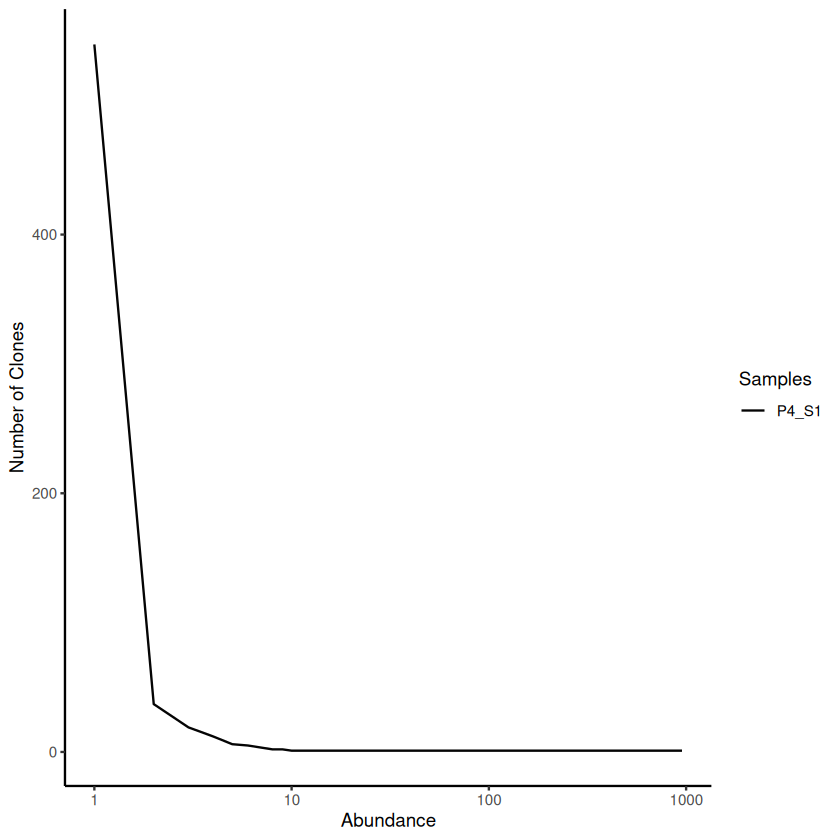

In [30]:
# a total number of clones by the number of instances within the sample or run
clonalAbundance(combined.TCR_p4, 
                cloneCall = "gene", 
                scale = FALSE)

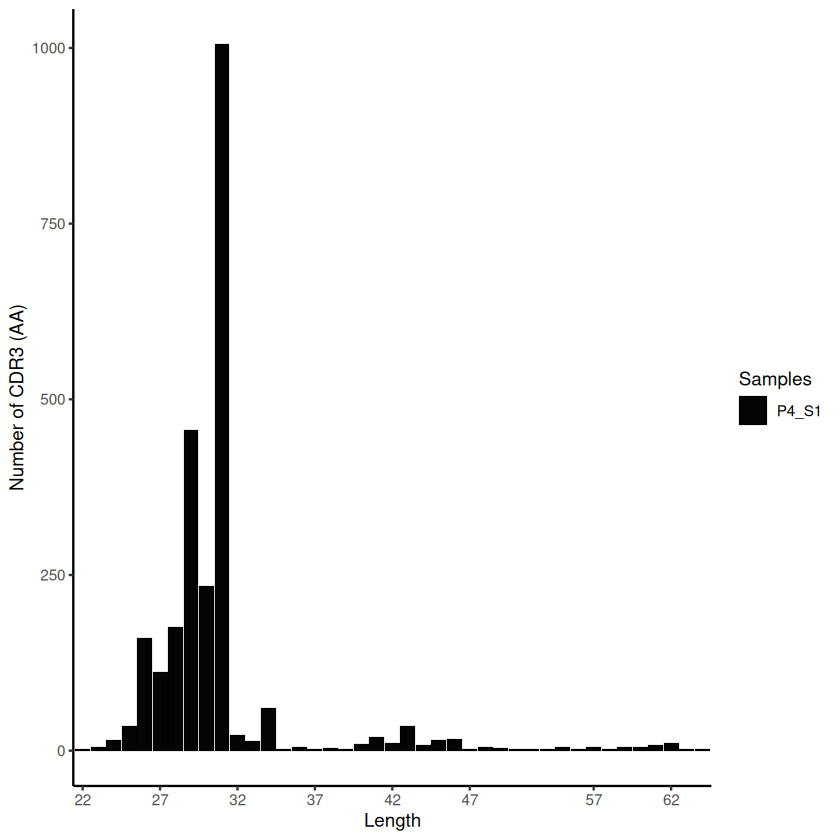

In [31]:
clonalLength(combined.TCR_p4, 
             cloneCall="aa", 
             chain = "both") 

In [32]:
sapply(contig_list_1, nrow)
sapply(contig_list_2, nrow)

[1] 8871

P17B  P17L  P18B  P18L  P19B  P19L  P20B  P20L 
 5504  5304  3005  2467 15003  5011 18513   347

## 5. Seurat using sctransform and RPCA integration on patients 3 and 4

In [33]:
# load in the pbmc systematic comparative analysis dataset
#obj <- LoadData("pbmcsca")
#obj <- subset(obj, nFeature_RNA > 1000)
#obj <- RunAzimuth(obj, reference = "pbmcref")
# currently, the object has two layers in the RNA assay: counts, and data
#obj


### Using integratelayers()

In [34]:
#patient3_transform

In [35]:
#patient3_transform@version
#patient4_transform@version

In [36]:
#DefaultAssay(patient3_transform) <- "RNA"
#DefaultAssay(patient4_transform) <- "RNA"

In [37]:
#merged_seurat <- merge(patient3_transform, patient4_transform)

In [38]:
#merged_seurat <- SCTransform(merged_seurat, verbose = FALSE)

In [39]:
#merged_seurat <- RunPCA(merged_seurat, npcs = 35)

In [40]:
#merged_seurat <- IntegrateLayers(
#  object = merged_seurat,
#  method = RPCAIntegration,
#  orig.reduction = "pca",
#  new.reduction = "integrated.rpca",
#  verbose = TRUE,
#  layers = "RNA"
#)

### integratedata()

In [41]:
seurat_list <- list(patient3_transform, patient4_transform)

In [42]:
seurat_list <- lapply(seurat_list, function(x) {
  x <- NormalizeData(x)
  x <- FindVariableFeatures(x, selection.method = "vst", nfeatures = 3000)
})

In [43]:
features <- SelectIntegrationFeatures(object.list = seurat_list)
#features <- SelectIntegrationFeatures(object.list = seurat_list, nfeatures = 3000)

In [44]:
anchors <- FindIntegrationAnchors(
  object.list = seurat_list,
  anchor.features = features,
  dims = 1:30,
  k.anchor = 5,
  reference = c(1, 2)
)

Scaling features for provided objects

Finding anchors between all query and reference datasets

Running CCA

Merging objects

Finding neighborhoods

Finding anchors

	Found 1610 anchors

Filtering anchors

	Retained 1421 anchors



In [45]:
integrated_seurat <- IntegrateData(
  anchorset = anchors,
  dims = 1:30,
  k.weight = 100
)

Merging dataset 2 into 1

Extracting anchors for merged samples

Finding integration vectors

Finding integration vector weights

Integrating data

Warning message:
“Layer counts isn't present in the assay object; returning NULL”


In [46]:
integrated_seurat

An object of class Seurat 
47197 features across 3483 samples within 3 assays 
Active assay: integrated (2000 features, 2000 variable features)
 1 layer present: data
 2 other assays present: RNA, SCT

In [47]:
#DefaultAssay(integrated_seurat) <- "integrated"

In [48]:
integrated_seurat <- ScaleData(integrated_seurat)
integrated_seurat <- RunPCA(integrated_seurat, npcs = 30)
integrated_seurat <- RunUMAP(integrated_seurat, dims = 1:30)
integrated_seurat <- FindNeighbors(integrated_seurat, dims = 1:30)
integrated_seurat <- FindClusters(integrated_seurat, resolution = 0.5)

Centering and scaling data matrix

PC_ 1 
Positive:  EEF1A1, IL7R, RPL34, TPT1, PABPC1, RPS6, RPS29, RPS27, FTH1, RPS12 
	   RPL39, RPL3, RPL21, RPS13, KLF2, RPS3A, SELL, RPL10, RPL32, RPL27A 
	   RPS2, RPS8, RPS4X, RPS3, RPS18, RPLP2, SORL1, RPL38, ANXA1, RPL13 
Negative:  DUSP4, HLA-DRB1, CXCL13, MYO7A, CCL5, RBPJ, GZMB, HSPA1A, ITGAE, NKG7 
	   PRDM1, HAVCR2, ENTPD1, CTLA4, VCAM1, TOX, RGS1, CBLB, TNFRSF9, IKZF3 
	   PMAIP1, CD74, HLA-DRA, ADGRG1, HLA-DRB6, APOBEC3C, LYST, LAYN, AKAP5, GOLIM4 
PC_ 2 
Positive:  HLA-B, MT-ND1, MT-ATP6, MT-CO1, MT-CO2, MT-ND4, ACTB, MT-ND2, MT-CYB, TMSB4X 
	   HSP90AA1, MT-CO3, CXCR4, VIM, RRM2, CD74, TOP2A, JUND, MKI67, STMN1 
	   TYMS, HLA-DRB1, SRGN, MT-ND5, DUSP4, TUBA1B, HSPA1A, ZFP36L2, ZFP36, BTG1 
Negative:  SESN3, ENSG00000266049, BACH2, ABLIM1, LINC-PINT, N4BP2L2, SMCHD1, STAT4, SNED1, CCR7 
	   LEF1, CAMK4, SELL, PITPNC1, LNCRNA-IUR, USP15, GPCPD1, MALAT1, OGT, TALAM1 
	   PDE3B, RIPOR2, LINC00513, RPL13, ZBTB47-AS1, HECTD1, STAT3, HERC1, N

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3483
Number of edges: 161580

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8083
Number of communities: 5
Elapsed time: 0 seconds


In [49]:
integrated_seurat

An object of class Seurat 
47197 features across 3483 samples within 3 assays 
Active assay: integrated (2000 features, 2000 variable features)
 2 layers present: data, scale.data
 2 other assays present: RNA, SCT
 2 dimensional reductions calculated: pca, umap

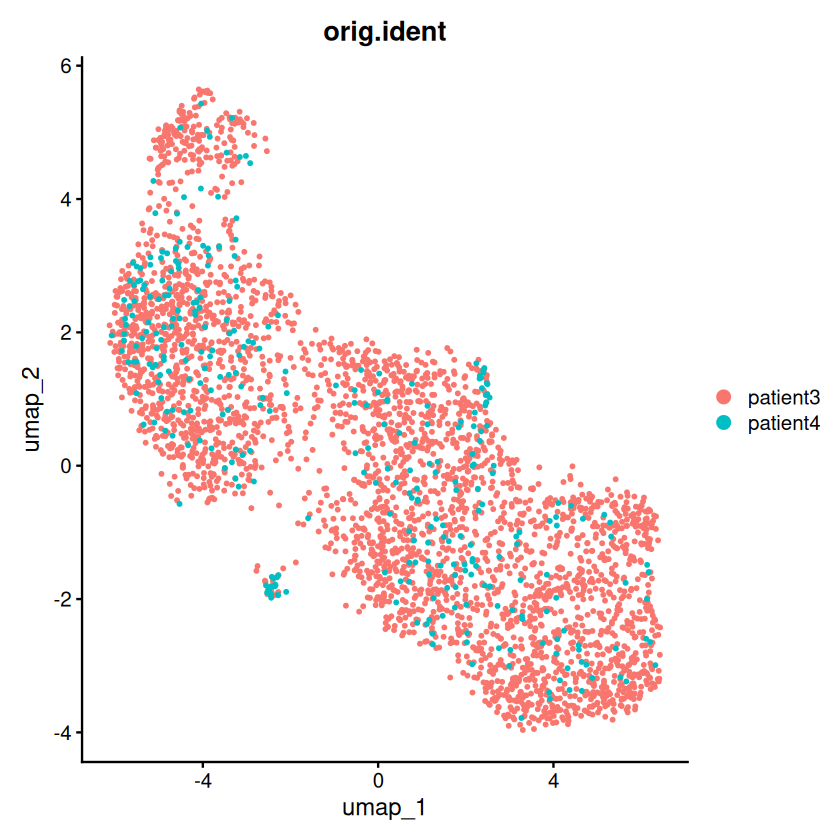

In [50]:
DimPlot(integrated_seurat, reduction = "umap", group.by = "orig.ident")

In [51]:
#head(patient3_transform@meta.data)
#head(patient4_transform@meta.data)


--------------------

## 6. scRepertoire on patients 3 and 4 - integrated. data

In [52]:
#' #Getting a sample of a Seurat object
#' scRep_example <- get(data("scRep_example"))
#' 
#' #Using combineExpresion()
#' scRep_example <- combineExpression(combined, scRep_example)

In [53]:
head(S2)
summary(S2)

cell_id cell_type_experimental high_quality_cell locus sequence_id 
1 111840  T_CD8_memory           True              TRA   111840_TRA_1
2 111840  T_CD8_memory           True              TRB   111840_TRB_1
3 146164  T_CD8_memory           True              TRB   146164_TRB_1
4 166368  T_CD8_memory           True              TRA   166368_TRA_1
5 166368  T_CD8_memory           True              TRB   166368_TRB_1
6 205244  T_CD8_memory           False             TRB   205244_TRB_2
  consensus_count umi_count
1  6529           5        
2  1130           4        
3 13953           6        
4  2183           4        
5   495           4        
6  4500           2        
  sequence                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         
1 GCAGTGCCAGGCTCATAGGGGCACATGAAGTGTCTACCTTCTGCAGACTACAGTGGCTCAGGAACCGGGGATGCAGTGCCAGGCTCATGGTATCCTGCAGCAGATGTGGGGAGCTTTCCTTCTCTATGTTTCCATGAAGATGGGAGGCACTGCAGGACAAAGCCTTGAGCAGCCCTCTGAAGTGACAGCTGTGGAAGGAGCCATTGTCCAGATAAACTGCACGTACCAGACATCTGGGTTTTATGGGCTGTCCTGGTACCAGCAACATGATGGCGGAGCACCCACATTTCTTTCTTACAATGCTCTGGATGGTTTGGAGGAGACAGGTCGTTTTTCTTCATTCCTTAGTCGCTCTGATAGTTATGGTTACCTCCTTCTACAGGAGCTCCAGATGAAAGACTCTGCCTCTTACTTCTGCGCTGTGAACAACAATGCCAGACTCATGTTTGGAGATGGAACTCAGCTGGTGGTGAAGCCCAATATCCAGAACCCTGACCCTGCCGTGTACCAGCTGAGAGACTCTAAATCCAGTGACAAGTCTGTCTGCCTATTCACCGATTTTGAT                                            
2 CCCTGTGTCTCCTGGGGGCAGATCATGCAGATACTGGAGTCTCCCAGAACCCCAGACACAAGATCACAAAGAGGGGACAGAATGTAACTTTCAGGTGTGATCCAATTTCTGAACACAACCGCCTTTATTGGTACCGACAGACCCTGGGGCAGGGCCCAGAGTTTCTGACTTACTTCCAGAATGAAGCTCAACTAGAAAAATCAAGGCTGCTCAGTGATCGGTTCTCTGCAGAGAGGCCTAAGGGATCTTTCTCCACCTTGGAGATCCAGCGCACAGAGCAGGGGGACTCGGCCATGTATCTCTGTGCCAGCAGCTTAGTGGGGGGGGGCGGGAATGAGCAGTTCTTCGGGCCAGGGACACGGCTCACCGTGCTAGAGGACCTGAAAAACGTGTTCCCACCCGAGGTCGCTGTGTTTGAGCCATCAGAAGCAGAGATC                                                                                                                                                                            
3 CCTGCCTGATGCTTATAGGGGGAAGAGGTGGAGACGTTACAGAAACCACCTGGAGCCCCCAGAACTGGCAGACACCTGCCTGATGCTGCCATGGGCCCCCAGCTCCTTGGCTATGTGGTCCTTTGCCTTCTAGGAGCAGGCCCCCTGGAAGCCCAAGTGACCCAGAACCCAAGATACCTCATCACAGTGACTGGAAAGAAGTTAACAGTGACTTGTTCTCAGAATATGAACCATGAGTATATGTCCTGGTATCGACAAGACCCAGGGCTGGGCTTAAGGCAGATCTACTATTCAATGAATGTTGAGGTGACTGATAAGGGAGATGTTCCTGAAGGGTACAAAGTCTCTCGAAAAGAGAAGAGGAATTTCCCCCTGATCCTGGAGTCGCCCAGCCCCAACCAGACCTCTCTGTACTTCTGTGCCAGCAGGCCCCCTAGCACAGATACGCAGTATTTTGGCCCAGGCACCCGGCTGACAGTGCTCGAGGACCTGAAAAACGTGTTCCCACCCGAGGTCGCTGTGTTTGAGCCATCAGAAGCAGAGATC                                                               
4 GGGTTTTCGTGATTATAGGGGAAAGCAGATTCTTTTTATGATTTTTAAAGTAGAAATATCCATTCTAGGTGCATTTTTTAAGGGTTTAAAATTTGAATCCTCAGTGAACCAGGGCAGAGAAGAATGATGAAATCCTTGAGAGTTTTACTAGTGATCCTGTGGCTTCAGTTGAGCTGGGTTTGGAGCCAACAGAAGGAGGTGGAGCAGAATTCTGGACCCCTCAGTGTTCCAGAGGGAGCCATTGCCTCTCTCAACTGCACTTACAGTGACCGAGGTTCCCAGTCCTTCTTCTGGTACAGACAATATTCTGGGAAAAGCCCTGAGTTGATAATGTTCATATACTCCAATGGTGACAAAGAAGATGGAAGGTTTACAGCACAGCTCAATAAAGCCAGCCAGTATGTTTCTCTGCTCATCAGAGACTCCCAGCCCAGTGATTCAGCCACCTACCTCTGTGCCGTGACCCCCAATTCCGGGTATGCACTCAACTTCGGCAAAGGCACCTCGCTGTTGGTCACACCCCATATCCAGAACCCTGACCCTGCCGTGTACCAGCTGAGAGACTCTAAATCCAGTGACAAGTCTGTCTGCCTATTCACCGATTTTGAT
5 CCCTGCCATGGGCACCGTGACCCTGATTGGGCAAAGCTCCCATCCTTCCCTGACCCTGCCATGGGCACCAGGCTCCTCTGCTGGGCGGCCCTCTGTCTCCTGGGAGCAGAACTCACAGAAGCTGGAGTTGCCCAGTCTCCCAGATATAAGATTATAGAGAAAAGGCAGAGTGTGGCTTTTTGGTGCAATCCTATATCTGGCCATGCTACCCTTTACTGGTACCAGCAGATCCTGGGACAGGGCCCAAAGCTTCT

    cell_id         cell_type_experimental high_quality_cell 
 Min.   :  111840   Length:1104            Length:1104       
 1st Qu.:16570333   Class :character       Class :character  
 Median :31420516   Mode  :character       Mode  :character  
 Mean   :29981984                                            
 3rd Qu.:43925625                                            
 Max.   :56566004                                            
                                                             
    locus           sequence_id        consensus_count   umi_count     
 Length:1104        Length:1104        Min.   :    1   Min.   : 1.000  
 Class :character   Class :character   1st Qu.: 1956   1st Qu.: 3.000  
 Mode  :character   Mode  :character   Median : 5085   Median : 6.000  
                                       Mean   : 9861   Mean   : 8.756  
                                       3rd Qu.:12196   3rd Qu.:12.000  
                                       Max.   :74530   Max.   :74.000  


In [54]:
sapply(combined.TCR_p3, nrow)
sapply(combined.TCR_p4, nrow)
sapply(S1, nrow)
sapply(S2, nrow)

P3_S1 
 3532

P4_S1  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA> 
 2471     0     0     0     0     0     0     0

$cell_id
NULL

$cell_type_experimental
NULL

$high_quality_cell
NULL

$locus
NULL

$sequence_id
NULL

$consensus_count
NULL

$umi_count
NULL

$sequence
NULL

$sequence_length
NULL

$sequence_aa
NULL

$sequence_aa_length
NULL

$sequence_alignment
NULL

$sequence_alignment_length
NULL

$sequence_alignment_aa
NULL

$sequence_alignment_aa_length
NULL

$germline_alignment
NULL

$germline_alignment_aa
NULL

$v_germline_alignment
NULL

$v_germline_alignment_aa
NULL

$d_germline_alignment
NULL

$d_germline_alignment_aa
NULL

$j_germline_alignment
NULL

$j_germline_alignment_aa
NULL

$v_germline_start
NULL

$v_germline_end
NULL

$d_germline_start
NULL

$d_germline_end
NULL

$j_germline_start
NULL

$j_germline_end
NULL

$np1_length
NULL

$np2_length
NULL

$junction
NULL

$junction_aa
NULL

$productive
NULL

$rev_comp
NULL

$complete_vdj
NULL

$v_call
NULL

$v_support
NULL

$v_cigar
NULL

$v_sequence_start
NULL

$v_sequence_end
NULL

$d_call
NULL

$d_support
NULL

$d_cigar
NULL

$d_sequence_start
NULL

$d_sequence_end
NULL

$j_call
NULL

$j_support
NULL

$j_cigar
NULL

$j_sequence_start
NULL

$j_sequence_end
NULL

$c_call
NULL

$fwr1
NULL

$fwr1_aa
NULL

$fwr2
NULL

$fwr2_aa
NULL

$fwr3
NULL

$fwr3_aa
NULL

$fwr4
NULL

$fwr4_aa
NULL

$cdr1
NULL

$cdr1_aa
NULL

$cdr2
NULL

$cdr2_aa
NULL

$cdr3
NULL

$cdr3_aa
NULL

$cell_id
NULL

$cell_type_experimental
NULL

$high_quality_cell
NULL

$locus
NULL

$sequence_id
NULL

$consensus_count
NULL

$umi_count
NULL

$sequence
NULL

$sequence_length
NULL

$sequence_aa
NULL

$sequence_aa_length
NULL

$sequence_alignment
NULL

$sequence_alignment_length
NULL

$sequence_alignment_aa
NULL

$sequence_alignment_aa_length
NULL

$germline_alignment
NULL

$germline_alignment_aa
NULL

$v_germline_alignment
NULL

$v_germline_alignment_aa
NULL

$d_germline_alignment
NULL

$d_germline_alignment_aa
NULL

$j_germline_alignment
NULL

$j_germline_alignment_aa
NULL

$v_germline_start
NULL

$v_germline_end
NULL

$d_germline_start
NULL

$d_germline_end
NULL

$j_germline_start
NULL

$j_germline_end
NULL

$np1_length
NULL

$np2_length
NULL

$junction
NULL

$junction_aa
NULL

$productive
NULL

$rev_comp
NULL

$complete_vdj
NULL

$v_call
NULL

$v_support
NULL

$v_cigar
NULL

$v_sequence_start
NULL

$v_sequence_end
NULL

$d_call
NULL

$d_support
NULL

$d_cigar
NULL

$d_sequence_start
NULL

$d_sequence_end
NULL

$j_call
NULL

$j_support
NULL

$j_cigar
NULL

$j_sequence_start
NULL

$j_sequence_end
NULL

$c_call
NULL

$fwr1
NULL

$fwr1_aa
NULL

$fwr2
NULL

$fwr2_aa
NULL

$fwr3
NULL

$fwr3_aa
NULL

$fwr4
NULL

$fwr4_aa
NULL

$cdr1
NULL

$cdr1_aa
NULL

$cdr2
NULL

$cdr2_aa
NULL

$cdr3
NULL

$cdr3_aa
NULL

In [55]:
#combined.TCR_p3 <- combined.TCR_p3[sapply(combined.TCR_p3, nrow) > 0]
#combined.TCR_p4 <- combined.TCR_p4[sapply(combined.TCR_p4, nrow) > 0]

In [56]:
sapply(combined.TCR_p3, nrow)
sapply(combined.TCR_p4, nrow)

P3_S1 
 3532

P4_S1  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA> 
 2471     0     0     0     0     0     0     0

In [57]:
merged_TCR <- combineTCR(
  list(patient3 = combined.TCR_p3, patient4 = combined.TCR_p4),
  samples = c("patient3", "patient4"),
  removeNA = FALSE,
  removeMulti = FALSE,
  filterMulti = FALSE
)

ERROR: Error in (function (..., row.names = NULL, check.rows = FALSE, check.names = TRUE, : arguments imply differing number of rows: 2471, 0


In [58]:
names(combined.TCR_p3[[1]])
names(combined.TCR_p4[[1]])

[1] "barcode"  "sample"   "TCR1"     "cdr3_aa1" "cdr3_nt1" "TCR2"    
 [7] "cdr3_aa2" "cdr3_nt2" "CTgene"   "CTnt"     "CTaa"     "CTstrict"

[1] "barcode"  "sample"   "TCR1"     "cdr3_aa1" "cdr3_nt1" "TCR2"    
 [7] "cdr3_aa2" "cdr3_nt2" "CTgene"   "CTnt"     "CTaa"     "CTstrict"

In [ ]:
combined.TCR_p3 <- lapply(combined.TCR_p3, function(df) {
  df$chain <- "TRA" 
  return(df)
})

combined.TCR_p4 <- lapply(combined.TCR_p4, function(df) {
  df$chain <- "TRA"
  return(df)
})

In [59]:
merged_TCR <- combineTCR(
  list(patient3 = combined.TCR_p3, patient4 = combined.TCR_p4),
  samples = c("patient3", "patient4"),
  removeNA = FALSE,
  removeMulti = FALSE,
  filterMulti = FALSE
)

ERROR: Error in (function (..., row.names = NULL, check.rows = FALSE, check.names = TRUE, : arguments imply differing number of rows: 2471, 0


In [ ]:
contig_list_1
contig_list_2

In [ ]:
lapply(contig_list_1, nrow)
lapply(contig_list_2, nrow)

In [ ]:
merged_TCR <- combineTCR(
  list(patient3 = contig_list_1, patient4 = contig_list_2),
  samples = c("patient3", "patient4"),
  removeNA = FALSE,
  removeMulti = FALSE,
  filterMulti = FALSE
)

## combineExpression() on patient 3

In [ ]:
head(combined.TCR_p3[[i]]$barcode)

In [ ]:
rownames(patient3_transform@meta.data)

In [64]:
# Matching the barcodes
combined.TCR_p3 <- lapply(combined.TCR_p3, function(x) {
  x$barcode <- gsub("P3_S1_", "", x$barcode)
  return(x)
})

In [60]:
# checking metadata first
head(colnames(patient3_transform@meta.data))
colnames(combined.TCR_p3[[1]])
# Check barcodes in the TCR object (first list element)
head(combined.TCR_p3[[1]]$barcode, 10)  # Just the first 10 barcodes
barcodes_tcr <- unlist(lapply(combined.TCR_p3, function(x) x$barcode))
head(barcodes_tcr, 10)
# These are the cell names (barcodes) from the Seurat object
barcodes_seurat <- colnames(patient3_transform)
head(barcodes_seurat, 10)

[1] "orig.ident"   "nCount_RNA"   "nFeature_RNA" "percent.mt"   "nCount_SCT"  
[6] "nFeature_SCT"

[1] "barcode"  "sample"   "TCR1"     "cdr3_aa1" "cdr3_nt1" "TCR2"    
 [7] "cdr3_aa2" "cdr3_nt2" "CTgene"   "CTnt"     "CTaa"     "CTstrict"

[1] "P3_S1_10006345" "P3_S1_10007655" "P3_S1_10024172" "P3_S1_10069653"
 [5] "P3_S1_10075139" "P3_S1_10088479" "P3_S1_10094917" "P3_S1_10115275"
 [9] "P3_S1_10161117" "P3_S1_10181728"

P3_S11           P3_S12           P3_S13           P3_S14 
"P3_S1_10006345" "P3_S1_10007655" "P3_S1_10024172" "P3_S1_10069653" 
          P3_S15           P3_S16           P3_S17           P3_S18 
"P3_S1_10075139" "P3_S1_10088479" "P3_S1_10094917" "P3_S1_10115275" 
          P3_S19          P3_S110 
"P3_S1_10161117" "P3_S1_10181728"

[1] "4100"   "11356"  "21277"  "30102"  "41586"  "41975"  "66729"  "71338" 
 [9] "92469"  "115875"

In [ ]:
#patient3_transform$orig.ident <- as.character(patient3_transform$orig.ident)

In [66]:
sce <- combineExpression(
  combined.TCR_p3,
  patient3_transform,
  cloneCall = "CTgene",
  group.by = "sample",
  proportion = TRUE,
  cloneSize = c(Single = 1, Small = 5, Medium = 20, Large = 100, Hyperexpanded = 500)
)

In [67]:
sce
colnames(sce@meta.data)

An object of class Seurat 
44925 features across 3160 samples within 2 assays 
Active assay: SCT (21234 features, 3000 variable features)
 3 layers present: counts, data, scale.data
 1 other assay present: RNA

[1] "orig.ident"       "nCount_RNA"       "nFeature_RNA"     "percent.mt"      
 [5] "nCount_SCT"       "nFeature_SCT"     "CTgene"           "CTnt"            
 [9] "CTaa"             "CTstrict"         "clonalProportion" "clonalFrequency" 
[13] "cloneSize"

----

## combineExpression() on patient 4